Corentin Chanetreau - 74799

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 32, 'weights': 'distance'}
Best Score: 0.767093162734906
Test Accuracy: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.73      0.55      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
[[88 11]
 [25 30]]


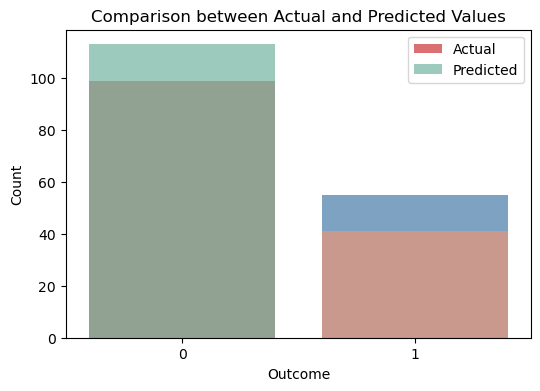

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Load the dataset
df = pd.read_csv("D:/Bureau/ESILV/S6/diabetes.csv")

# Check for missing values
print(df.isna().sum())

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KNN model
knn = KNeighborsClassifier()

# Define the grid of hyperparameters to test
param_grid = {
    'n_neighbors': np.arange(1, 35),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Display the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the comparison between actual and predicted values on the test set
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, palette='Set1', alpha=0.7, label='Actual')
sns.countplot(x=y_pred, palette='Set2', alpha=0.7, label='Predicted')
plt.legend()
plt.title('Comparison between Actual and Predicted Values')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()
